# Przewidywanie sprzedaży w black friday

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv').copy(deep=True)

## Analiza wstępna

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Wnioski z analizy wstępnej.
Dataset zawiera 550068 rekordów. Większość kolumn jest kompletnych. Wyjątek stanowią Product_Category_2 i Product_Category_3, które mają duże braki danych.

## Analiza szczegółowa

In [14]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

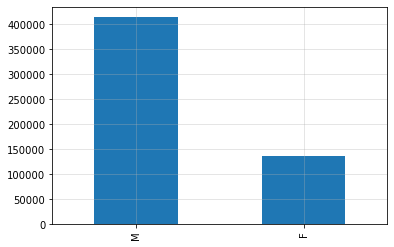

In [21]:
df['Gender'].value_counts().plot(kind='bar')
plt.grid(visible=True, alpha = 0.4)

Mamy 414259 mężczyzn i 135809 kobiet.

In [16]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

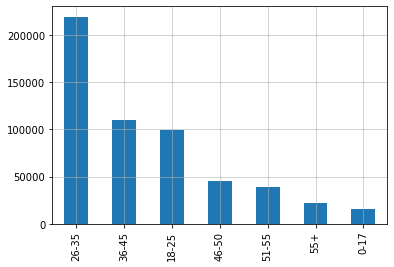

In [19]:
df['Age'].value_counts().plot(kind='bar')
plt.grid(visible=True, alpha = 0.7)

7 grup wiekowych. Najwięcej osób jest w grupie 26-35 lat. Najmniej 0-17.

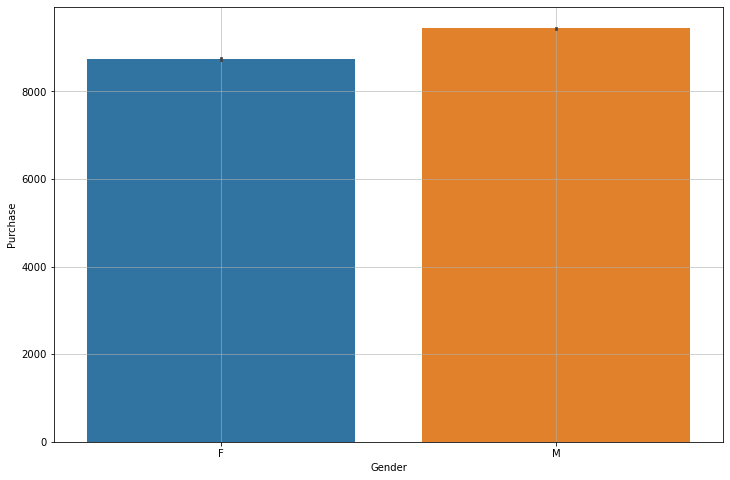

In [25]:
plt.figure(figsize=(12,8))

sns.barplot(x='Gender', y='Purchase', data = df)
plt.grid(visible=True, alpha = 0.7)

Więcej zakupów po stronie mężczyzn.

In [22]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

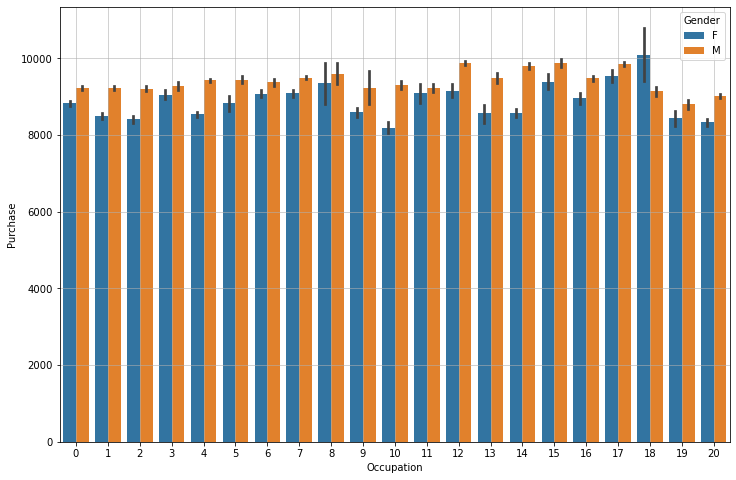

In [26]:
plt.figure(figsize=(12,8))

sns.barplot(x='Occupation', y='Purchase', hue = "Gender", data = df)
plt.grid(visible=True, alpha = 0.7)

Zawody wykonywane przez badanych są oznaczone wartościami liczbowymi. Tak prezentują się sumy wydane przez poszczególne zawody i z podziałem na płeć.

## Przygotowanie danych do ML

Spróbujemy zmienić rozkład kolumny purchase na bardziej gaussowski.

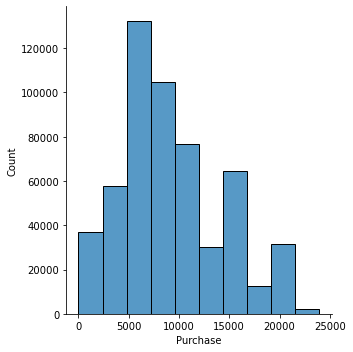

In [53]:
sns.displot(df['Purchase'], bins =10)

In [68]:
df['Purchase'].skew()

0.6001400037087128

In [3]:
from scipy import stats

df['Purchase'] = stats.boxcox(df['Purchase'])[0]

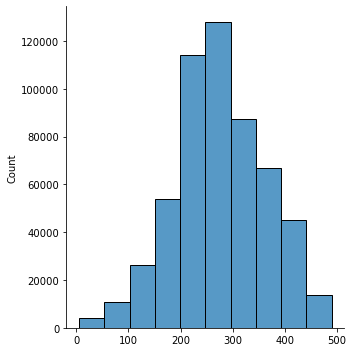

In [69]:
sns.displot(df['Purchase'], bins =10)

In [65]:
pd.Series(dfbox).skew()

-0.029783007571148476

Należy zająć się kolumnami z brakującymi danymi. Usiniemy kolumnę user id i zmienimy product id.

In [4]:
df = df.drop(['Product_Category_3'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


In [5]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [6]:
df = df.drop(['User_ID'], axis = 1)

In [7]:
df['Product_ID'] = df['Product_ID'].str.replace('P00', '')

In [37]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Product_Category_1']= ss.fit_transform(df['Product_Category_1'].values.reshape(-1, 1))
df['Product_Category_2']= ss.fit_transform(df['Product_Category_2'].values.reshape(-1, 1))
df['Product_ID'] = ss.fit_transform(df['Product_ID'].values.reshape(-1, 1))
df['Product_ID'].head()

0   -1.028774
1    0.722139
2   -0.845799
3   -0.869157
4    1.077382
Name: Product_ID, dtype: float64

In [74]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols=['Gender','City_Category','Age']
for i in cat_cols:
    df[i] = le.fit_transform(df[i])



In [11]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4)

In [12]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [13]:
df['City_Category'] = df['City_Category'].astype('category')

In [40]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_1,City_Category_2
0,-1.028774,0,0,10,2,0,-0.610809,-3.245432e-17,272.111431,0,0
1,0.722139,0,0,10,2,0,-1.118912,-9.131340e-01,379.980786,0,0
2,-0.845799,0,0,10,2,0,1.675656,-3.245432e-17,100.339181,0,0
3,-0.869157,0,0,10,2,0,1.675656,9.880753e-01,84.796601,0,0
4,1.077382,1,6,16,4,0,0.659449,-3.245432e-17,264.728900,0,1


In [41]:
X = df.drop('Purchase', axis = 1)
y = df['Purchase']
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_1,City_Category_2
0,-1.028774,0,0,10,2,0,-0.610809,-3.245432e-17,0,0
1,0.722139,0,0,10,2,0,-1.118912,-9.131340e-01,0,0
2,-0.845799,0,0,10,2,0,1.675656,-3.245432e-17,0,0
3,-0.869157,0,0,10,2,0,1.675656,9.880753e-01,0,0
4,1.077382,1,6,16,4,0,0.659449,-3.245432e-17,0,1


In [17]:
y

0         272.111431
1         379.980786
2         100.339181
3          84.796601
4         264.728900
             ...    
550063     46.339240
550064     46.557234
550065     25.977974
550066     46.120456
550067     54.654399
Name: Purchase, Length: 550068, dtype: float64

## Modelowanie

In [16]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [43]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Regresja liniowa

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)


print(f'R2: {round(r2_score(y_test,prediction), 2)}')
print(f'mean absolute error: {round(mean_absolute_error(y_test,prediction), 2)}')
print(f'mean squared error: {round(mean_squared_error(y_test,prediction), 2)}')
print(f'root mean squared error: {round((np.sqrt(mean_squared_error(y_test,prediction))), 2)}')

R2: 0.16
mean absolute error: 63.22
mean squared error: 6863.25
root mean squared error: 82.84


### Drzewo decyzyjne

In [29]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()

params = {
    'max_depth': np.arange(2, 10),
    'min_samples_leaf': [2, 3, 4, 5, 6]
    }
grid_search = GridSearchCV(model, param_grid= params, cv = 5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 6}

In [45]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=9, min_samples_leaf = 6)
model.fit(X_train, y_train)

prediction = model.predict(X_test)


print(f'R2: {round(r2_score(y_test,prediction), 2)}')
print(f'mean absolute error: {round(mean_absolute_error(y_test,prediction), 2)}')
print(f'mean squared error: {round(mean_squared_error(y_test,prediction), 2)}')
print(f'root mean squared error: {round((np.sqrt(mean_squared_error(y_test,prediction))), 2)}')

R2: 0.69
mean absolute error: 38.45
mean squared error: 2512.1
root mean squared error: 50.12


### Las losowy

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth = 9, min_samples_leaf = 6)
model.fit(X_train, y_train)

prediction = model.predict(X_test)


print(f'R2: {round(r2_score(y_test,prediction), 2)}')
print(f'mean absolute error: {round(mean_absolute_error(y_test,prediction), 2)}')
print(f'mean squared error: {round(mean_squared_error(y_test,prediction), 2)}')
print(f'root mean squared error: {round((np.sqrt(mean_squared_error(y_test,prediction))), 2)}')

R2: 0.69
mean absolute error: 38.2
mean squared error: 2488.85
root mean squared error: 49.89


In [46]:
from xgboost.sklearn import XGBRegressor

model = XGBRegressor(n_estimators=1000)
model.fit(X_train, y_train)

prediction = model.predict(X_test)


print(f'R2: {round(r2_score(y_test,prediction), 2)}')
print(f'mean absolute error: {round(mean_absolute_error(y_test,prediction), 2)}')
print(f'mean squared error: {round(mean_squared_error(y_test,prediction), 2)}')
print(f'root mean squared error: {round((np.sqrt(mean_squared_error(y_test,prediction))), 2)}')


R2: 0.75
mean absolute error: 34.35
mean squared error: 2072.67
root mean squared error: 45.53


Najlepsze wyniki osiągnął XGBoost. Najgorsze regresja liniowa.